# Predicting heart disease using machine 

It is a simple classification ML model for beginners

This notebook will predict wether the patient has heart disease or not

In [1]:
#Regular Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Plots inside the notebook
%matplotlib inline

# Scikit learn models
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay


## Data Load

In [2]:
df=pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df["target"].value_counts()


target
1    165
0    138
Name: count, dtype: int64

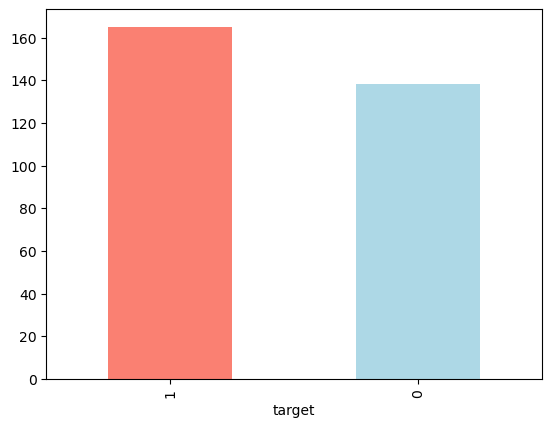

In [4]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);
plt.show();

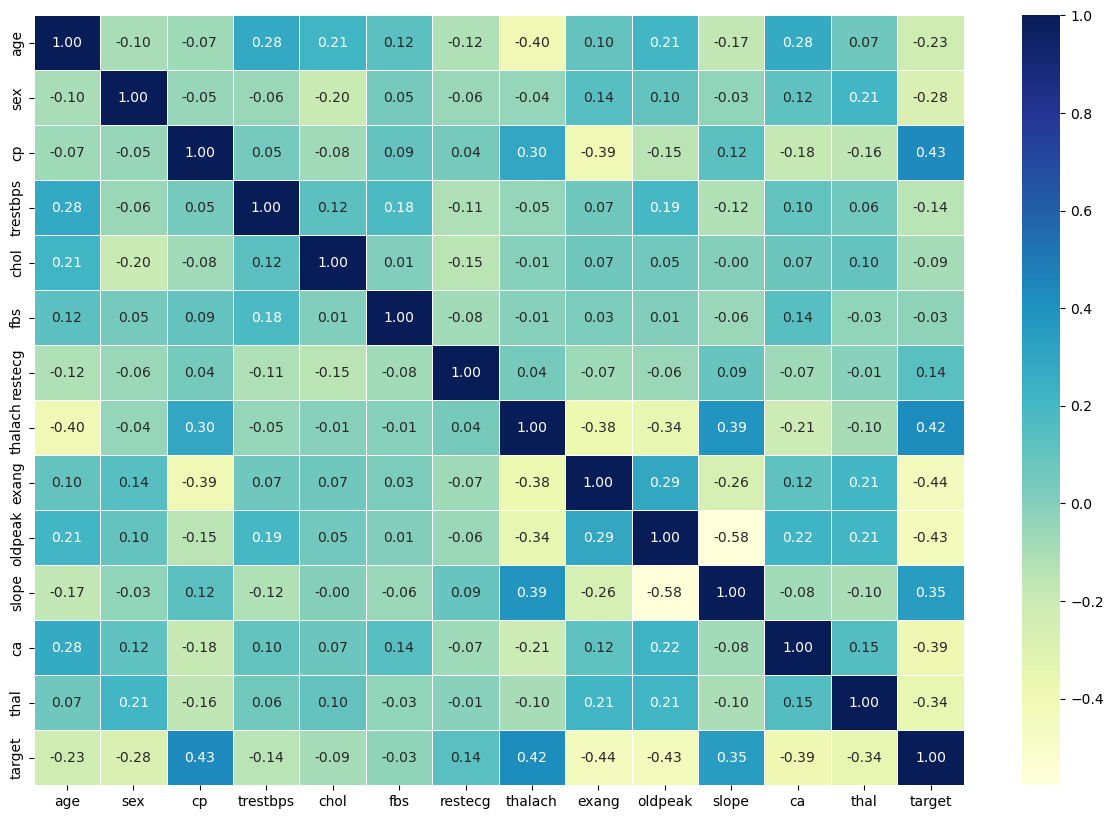

In [5]:
#corelation plot to visualize
co_matrix=df.corr()
fig , ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(co_matrix,annot=True,fmt=".2f",cmap="YlGnBu", linewidths=0.5,ax=ax);
plt.show();

In [6]:
#Splitting data in X and y
X=df.drop("target",axis=1)
y=df["target"]

#Splitting data in testing and training
np.random.seed(42)
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)


In [7]:
# Dictionary of models I'm using
models={"Logistic Regression":LogisticRegression(max_iter=1000),"KNN":KNeighborsClassifier(n_neighbors=11),"Random forest":RandomForestClassifier()}

#Function to fit and score models
def fit_and_score(models,X_train, X_test, y_train, y_test):
    np.random.seed(42)
    #dictionary to store scores of models
    model_scores={}
    for name,model in models.items():
        #Fit model to data
        model.fit(X_train,y_train)
        #evaluation of trained model
        model_scores[name]=model.score(X_test,y_test)
    return model_scores

In [8]:
model_scores=fit_and_score(models, X_train,X_test, y_train ,y_test)
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.7540983606557377,
 'Random forest': 0.8360655737704918}

In [9]:
 #grid for logisticRegression
log_reg_grid={"C":np.logspace(-4,4,20),"solver":["liblinear"]}
#grid for RandomForestClassifier
rf_grid={"n_estimators":np.arange(10,1000,50),"max_depth":[None,3,5,10], "min_samples_split":np.arange(2,20,20), "min_samples_leaf":np.arange(1,20,2)}

In [10]:
#Tune LogisticRegression
np.random.seed(42)
#setup hyperparameter search for LogisticRegression
rs_log_reg=RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid, cv=5, n_iter=20, verbose=True)
#fit hyperparameter search for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [11]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

In [12]:
#Tune RandomForest
np.random.seed(42)
#setup hyperparameter search for RandomForest
rs_rf=RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid, cv=5,n_iter=20,verbose=True)
#fit hyperparameter search for RandomForest
rs_rf.fit(X_test,y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([2]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [13]:
rs_rf.score(X_test,y_test)

0.9016393442622951

In [14]:
 #grid for logisticRegression
log_reg_grid={"C":np.logspace(-4,4,30),"solver":["liblinear"]}
np.random.seed(42)
gs_log_reg=GridSearchCV(LogisticRegression(), param_grid=log_reg_grid,cv=5, verbose=True)
gs_log_reg.fit(X_train,y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [15]:
gs_log_reg.score(X_train,y_train)

0.859504132231405

## Now making some evaluations 

But before that we need to make some predictions and comparisons

In [16]:
y_preds= gs_log_reg.predict(X_test)

In [17]:
y_preds


array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

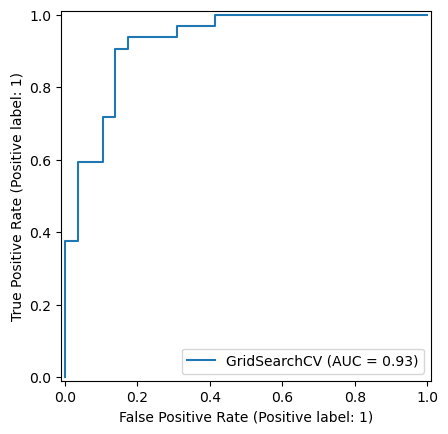

In [18]:
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)
plt.show();

In [19]:
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


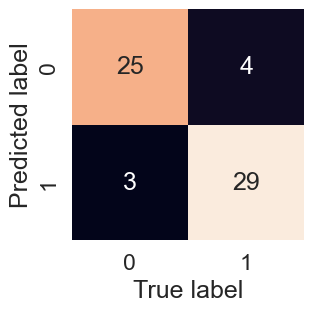

In [20]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test,y_preds):
    "Plots a nice looking confusion matrix using heatmap()"
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    plt.show();
plot_conf_mat(y_test, y_preds)


In [22]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [23]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [26]:
#Now creating new classifier using best parameters
clf=LogisticRegression(C= 0.20433597178569418, solver="liblinear")

In [29]:
#Doing cross validation for following evaluation scores
cv_acc=cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_acc=np.mean(cv_acc)
cv_acc

0.8446994535519124

In [31]:
#Doing cross validation for following evaluation scores
cv_precision=cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8207936507936507

In [32]:
#Doing cross validation for following evaluation scores
cv_recall=cross_val_score(clf,X,y,cv=5,scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.9212121212121213

In [33]:
#Doing cross validation for following evaluation scores
cv_f1=cross_val_score(clf,X,y,cv=5,scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

0.8673007976269721

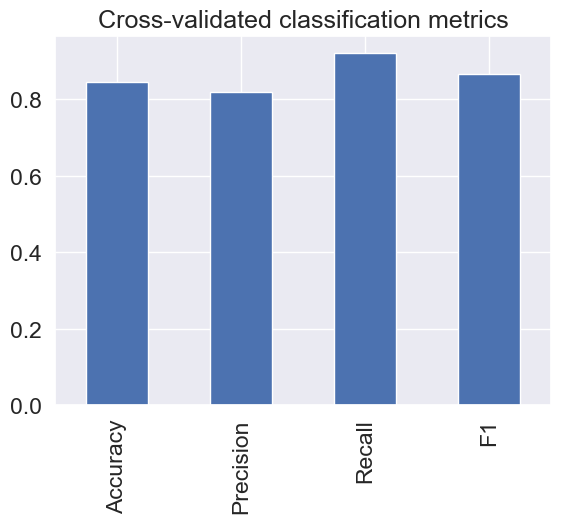

In [41]:
cv_metrics=pd.DataFrame({"Accuracy":cv_acc, "Precision":cv_precision, "Recall":cv_recall, "F1":cv_f1} ,index=[0]);
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",legend=False);
plt.show();

# feature importance can also be done to see important features